In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
import os
import pickle

In [6]:
print('hi')

hi


In [7]:
def get_result(result):
    if result[0][0] == 1:
        return('a')
    elif result[0][1] == 1:
        return ('b')
    elif result[0][2] == 1:
        return ('c')
    elif result[0][3] == 1:
        return ('d')
    elif result[0][4] == 1:
        return ('e')
    elif result[0][5] == 1:
        return ('f')
    elif result[0][6] == 1:
        return ('g')
    elif result[0][7] == 1:
        return ('h')
    elif result[0][8] == 1:
        return ('i')
    elif result[0][9] == 1:
        return ('j')
    elif result[0][10] == 1:
        return ('k')
    elif result[0][11] == 1:
        return ('l')
    elif result[0][12] == 1:
        return ('m')
    elif result[0][13] == 1:
        return ('n')
    elif result[0][14] == 1:
        return ('o')
    elif result[0][15] == 1:
        return ('p')
    elif result[0][16] == 1:
        return ('q')
    elif result[0][17] == 1:
        return ('r')
    elif result[0][18] == 1:
        return ('s')
    elif result[0][19] == 1:
        return ('t')
    elif result[0][20] == 1:
        return ('u')
    elif result[0][21] == 1:
        return ('v')
    elif result[0][22] == 1:
        return ('w')
    elif result[0][23] == 1:
        return ('x')
    elif result[0][24] == 1:
        return ('y')
    elif result[0][25] == 1:
        return ('z')

In [8]:
dataset = pd.read_csv("A_Z Handwritten Data.csv").astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

# Splite data the X - Our data , and y - the prdict label
X = dataset.drop('label',axis = 1)
y = dataset['label']

Amount of each labels


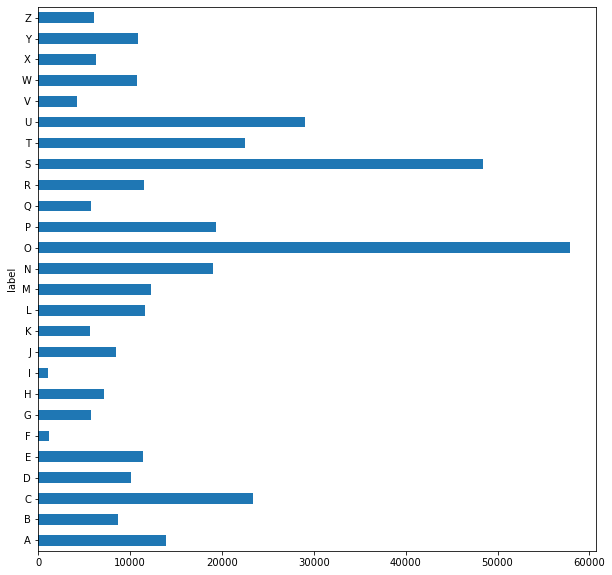

In [9]:
print("Amount of each labels")

# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# splite the data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [14]:
from keras.utils import np_utils

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [15]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
X_train[0].shape

(28, 28, 1)

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 26, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dense_1 (Dense)              (None, 26)                3

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=256)

Epoch 1/20
1092/1092 [==============================] - 130s 119ms/step - loss: 0.0169 - accuracy: 0.9950 - val_loss: 0.0126 - val_accuracy: 0.9976
Epoch 2/20
1092/1092 [==============================] - 129s 118ms/step - loss: 0.0130 - accuracy: 0.9957 - val_loss: 0.0136 - val_accuracy: 0.9970
Epoch 3/20
 978/1092 [=========================>....] - ETA: 12s - loss: 0.0110 - accuracy: 0.9963

In [20]:
mypred = model.predict(X_train[0])

ValueError: in user code:

    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 1)
